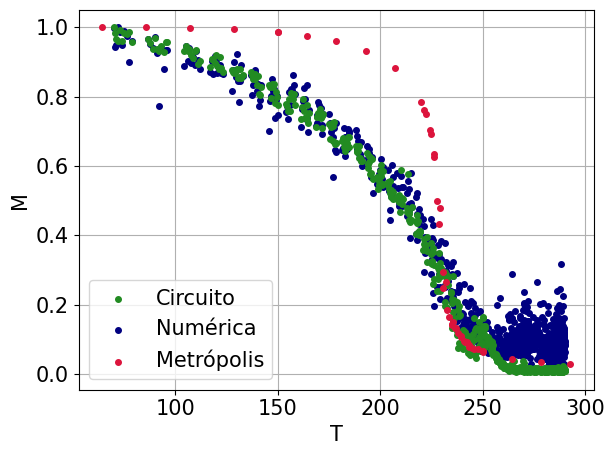

In [153]:
plt.scatter(temperaturas,mag_c,c='forestgreen',label='Circuito',zorder=2)
plt.scatter(temperaturas,mag_num,c='navy',label='Numérica',zorder=1)
plt.scatter(temperaturas_met*100,mag_met,c='crimson',label='Metrópolis',zorder=3)
plt.grid()
plt.legend()
plt.xlabel('T')
plt.ylabel('M')
plt.tight_layout()
plt.savefig('plots informe/magnetizacion escala.png')

[0.39493445]
R-squared: 0.8822062114395547
[161.40522496 238.93008332]


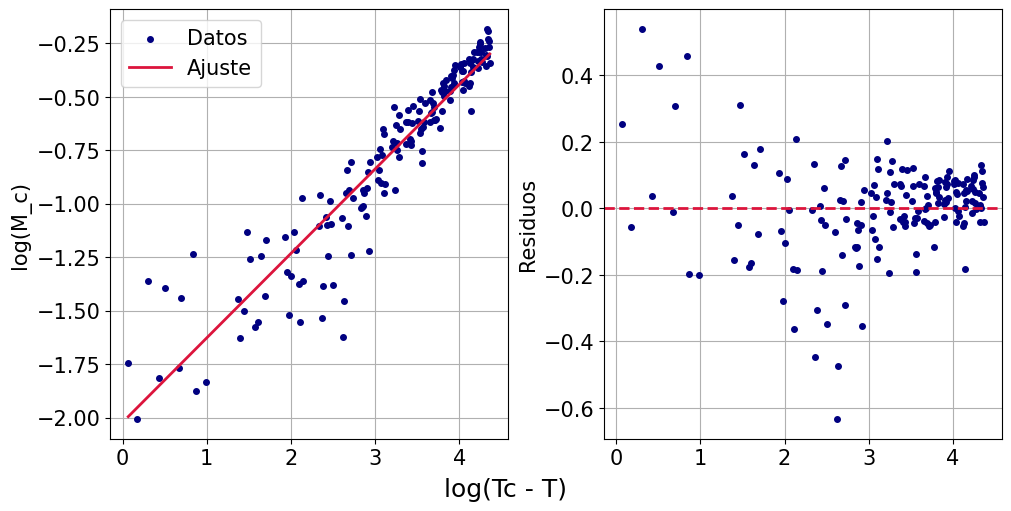

In [147]:
T_c_estimate = 240

x = np.log(T_c_estimate-temperaturas[temperaturas<T_c_estimate])
y = np.log(mag_num[temperaturas<T_c_estimate])

#y = y[x>2]
#x = x[x>2]
y = y[x<4.4]
x = x[x<4.4]

# Reshape x for sklearn (2D array required)
X = x.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
print(model.coef_)
# Predict y-values using the linear model
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals against x
fig,axs = plt.subplots(1,2,figsize=(10,5),sharex=True,layout='constrained')
axs = axs.flat

axs[0].scatter(x,y,c='navy',label='Datos',zorder=1)
axs[0].plot(x,y_pred,'crimson',label='Ajuste',zorder=2)
axs[0].grid()
axs[0].legend()
axs[0].set_ylabel('log(M_c)')

axs[1].scatter(x, residuals,c='navy',zorder=1)
axs[1].axhline(y=0, color='crimson', linestyle='--',zorder=2)  # Add horizontal line at y=0 for reference
axs[1].grid()
axs[1].set_ylabel('Residuos')

fig.supxlabel('log(Tc - T)')
plt.savefig('plots informe/linealidad_met.png')

# Print R-squared value
r_squared = model.score(X, y)
print("R-squared:", r_squared)

lineal_range_num = np.array([240-np.e**max(x),240-np.e**min(x)])
print(lineal_range_num)

/tmp/ipykernel_20862/2993154825.py:3: RuntimeWarning: invalid value encountered in power
  func = lambda T,Tc,a,b : abs(a)*(Tc-T)**b


2.289465159784201 1.28721726576403 0.1979055871859192
2.957477516930344e-06 0.0006387319178163381


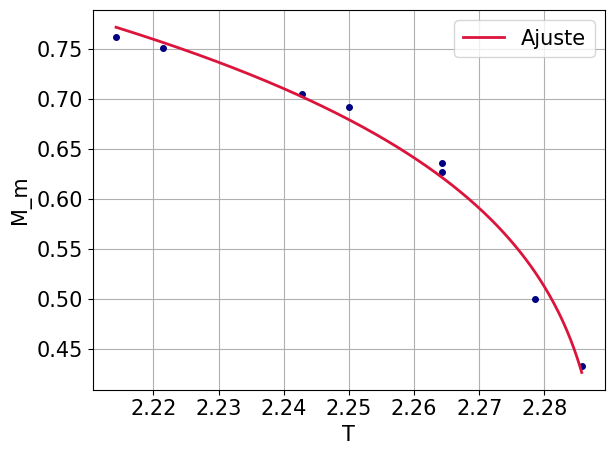

In [150]:
mags = mag_met[temperaturas_met<lineal_range_met[1]]
temps = temperaturas_met[temperaturas_met<lineal_range_met[1]]
mags = mags[lineal_range_met[0]<temps]
temps = temps[lineal_range_met[0]<temps]

pars,cov = cf(func,temps,mags,p0=[lineal_range_met[1],1,0.33])

x_adj = np.linspace(min(temps),max(temps[temps<pars[0]]),300)

plt.scatter(temps,mags,c='navy',zorder=2)
plt.plot(x_adj,func(x_adj,*pars),'crimson',label='Ajuste',zorder=3)
plt.grid()
plt.legend()
plt.xlabel('T')
plt.ylabel('M_m')
plt.tight_layout()
print(*pars)
Tc_num = pars[0]
print(cov[0,0],cov[2,2])
plt.savefig('plots informe/ajuste_sim.png')

In [149]:
np.sqrt(0.0006387319178163381)

0.025273146179617966

[0.53963369]
R-squared: 0.8792202751238174
[158.96236279 239.08259135]


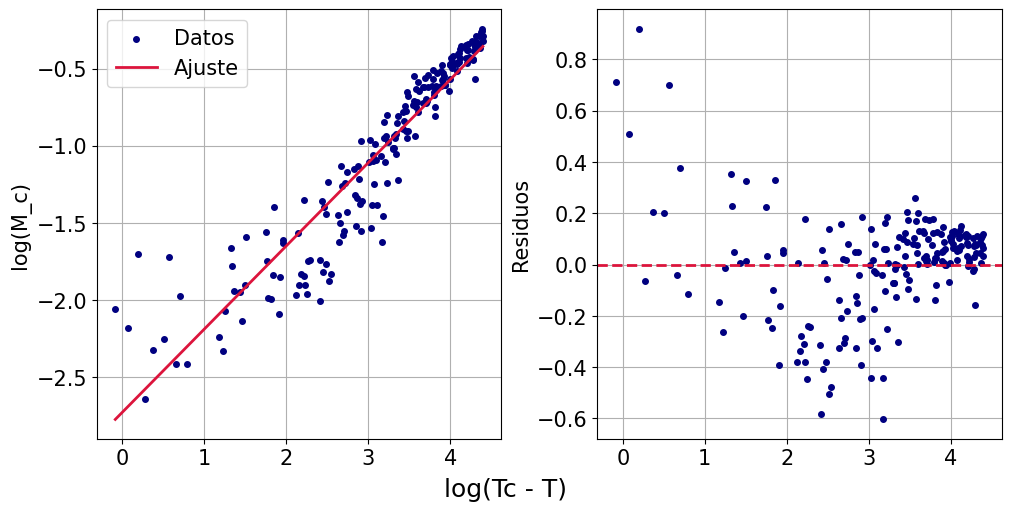

In [118]:
T_c_estimate = 250

x = np.log(T_c_estimate-temperaturas[temperaturas<T_c_estimate])
y = np.log(mag_num[temperaturas<T_c_estimate])

#y = y[x>2]
#x = x[x>2]
y = y[x<4.4]
x = x[x<4.4]

# Reshape x for sklearn (2D array required)
X = x.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
print(model.coef_)
# Predict y-values using the linear model
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals against x
fig,axs = plt.subplots(1,2,figsize=(10,5),sharex=True,layout='constrained')
axs = axs.flat

axs[0].scatter(x,y,c='navy',label='Datos',zorder=1)
axs[0].plot(x,y_pred,'crimson',label='Ajuste',zorder=2)
axs[0].grid()
axs[0].legend()
axs[0].set_ylabel('log(M_c)')

axs[1].scatter(x, residuals,c='navy',zorder=1)
axs[1].axhline(y=0, color='crimson', linestyle='--',zorder=2)  # Add horizontal line at y=0 for reference
axs[1].grid()
axs[1].set_ylabel('Residuos')

fig.supxlabel('log(Tc - T)')
plt.savefig('plots informe/linealidad_.png')

# Print R-squared value
r_squared = model.score(X, y)
print("R-squared:", r_squared)

lineal_range_c = np.array([240-np.e**max(x),240-np.e**min(x)])
print(lineal_range_c)

In [113]:
np.sqrt(0.00019801822507065588)

0.014071894864255342

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from scipy.integrate import cumtrapz
import os
import pandas as pd

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [31]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

def chi2_red(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

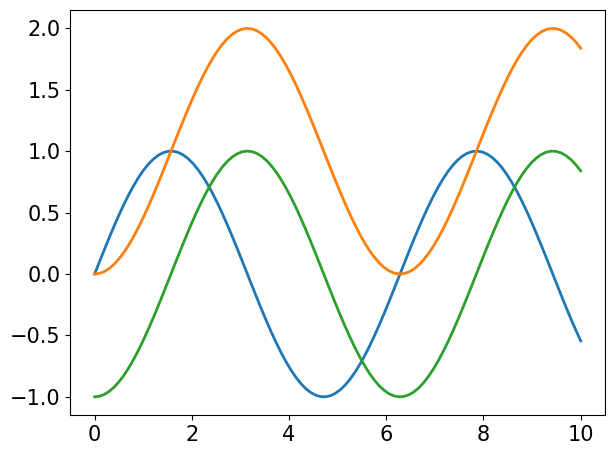

In [4]:
t = np.linspace(0,10,100)
y = np.sin(t)

integral_y = cumtrapz(y,t,initial=0)
plt.plot(t,y)
plt.plot(t,integral_y)
plt.plot(t,-np.cos(t))

In [20]:
temp = lambda R : (R-100)/0.385 + 273.15
lineal = lambda x,A,B : A*x+B
func = lambda T,Tc,a,b : abs(a)*(Tc-T)**b

In [6]:
files = os.listdir('files/med2')

names = []
for i in range(len(files)):
    if files[i].endswith('.csv'):
        names.append(float(files[i][:-4]))
names = np.sort(np.array(names))

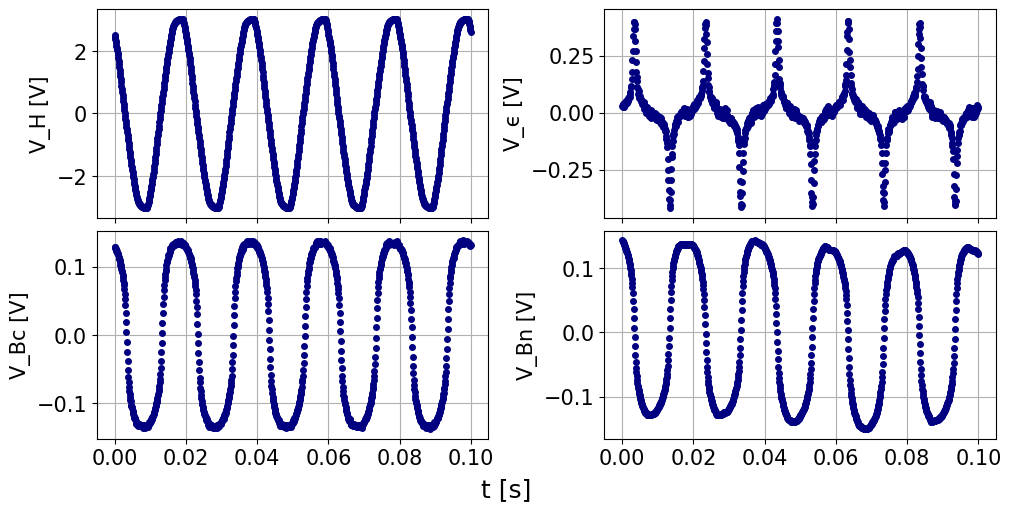

In [54]:
fig,axs = plt.subplots(2,2,figsize=(10,5),sharex=True,layout='constrained')
axs = axs.flat

axs[0].scatter(t,df.V_H,c='navy')
axs[0].grid()
axs[0].set_ylabel('V_H [V]')

axs[1].scatter(t,df.V_Bnint,c='navy')
axs[1].grid()
axs[1].set_ylabel(u'V_\u03F5 [V]')

axs[2].scatter(t,df.V_B,c='navy')
axs[2].grid()
axs[2].set_ylabel(u'V_Bc [V]')

axs[3].scatter(t,integral,c='navy')
axs[3].grid()
axs[3].set_ylabel(u'V_Bn [V]')

fig.supxlabel('t [s]')
plt.savefig('plots informe/signals.png')

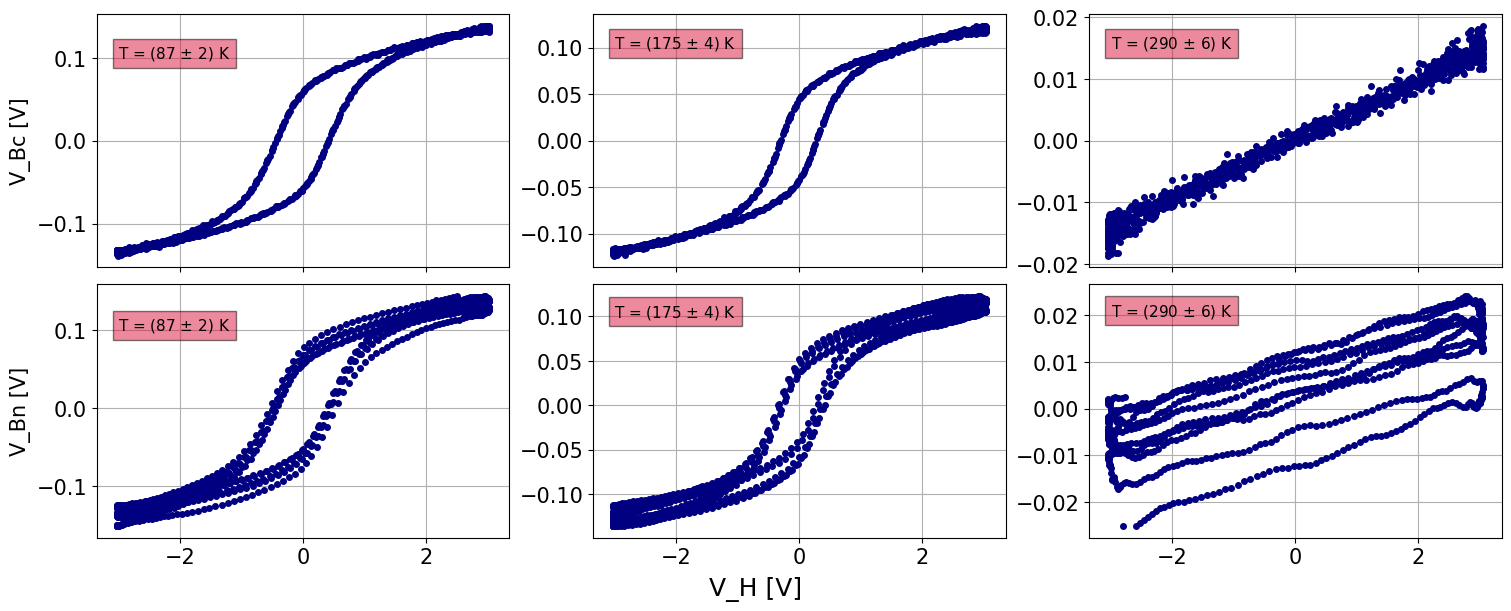

In [82]:
fig,axs = plt.subplots(2,3,figsize=(15,6),sharex=True,layout='constrained')
axs = axs.flat

df = read_df(10)
integral = integrate(df)
pars,cov = cf(lineal,df.V_pt/900,df.V_pr)
T = temp(pars[0])

axs[0].scatter(df.V_H,df.V_B,c='navy')
axs[0].grid()
axs[0].text(-3, 0.1, rf'T = ({int(np.round(T))} $\pm$ {int(np.round(0.02*T))}) K', fontsize=11, bbox=dict(facecolor='crimson', alpha=0.5))
axs[0].set_ylabel('V_Bc [V]')

axs[3].scatter(df.V_H,integral,c='navy')
axs[3].grid()
axs[3].text(-3, 0.1, rf'T = ({int(np.round(T))} $\pm$ {int(np.round(0.02*T))}) K', fontsize=11, bbox=dict(facecolor='crimson', alpha=0.5))
axs[3].set_ylabel('V_Bn [V]')

df = read_df(100)
integral = integrate(df)
pars,cov = cf(lineal,df.V_pt/900,df.V_pr)
T = temp(pars[0])

axs[1].scatter(df.V_H,df.V_B,c='navy')
axs[1].grid()
axs[1].text(-3, 0.1, rf'T = ({int(np.round(T))} $\pm$ {int(np.round(0.02*T))}) K', fontsize=11, bbox=dict(facecolor='crimson', alpha=0.5))

axs[4].scatter(df.V_H,integral,c='navy')
axs[4].grid()
axs[4].text(-3, 0.1, rf'T = ({int(np.round(T))} $\pm$ {int(np.round(0.02*T))}) K', fontsize=11, bbox=dict(facecolor='crimson', alpha=0.5))

df = read_df(-10)
integral = integrate(df)
pars,cov = cf(lineal,df.V_pt/900,df.V_pr)
T = temp(pars[0])

axs[2].scatter(df.V_H,df.V_B,c='navy')
axs[2].grid()
axs[2].text(-3, 0.015, rf'T = ({int(np.round(T))} $\pm$ {int(np.round(0.02*T))}) K', fontsize=11, bbox=dict(facecolor='crimson', alpha=0.5))

axs[5].scatter(df.V_H,integral,c='navy')
axs[5].grid()
axs[5].text(-3, 0.02, rf'T = ({int(np.round(T))} $\pm$ {int(np.round(0.02*T))}) K', fontsize=11, bbox=dict(facecolor='crimson', alpha=0.5))

fig.supxlabel('V_H [V]')
plt.savefig('plots informe/histeresis.png')

T = 86.53968367004572


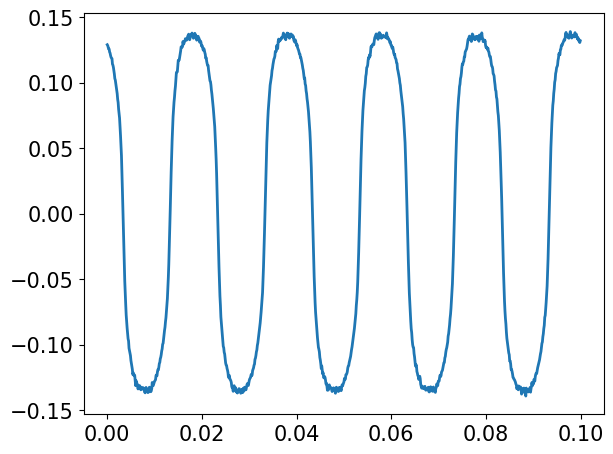

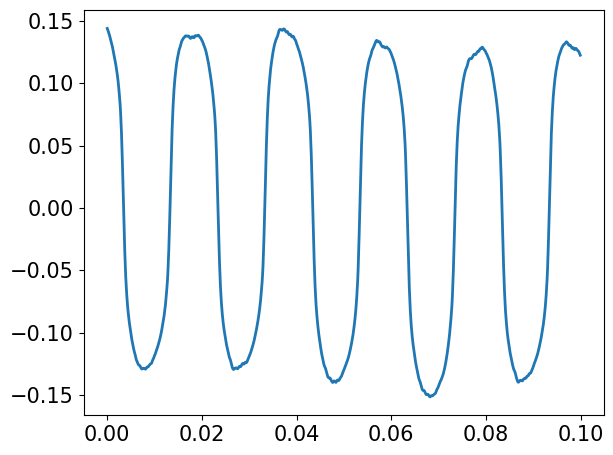

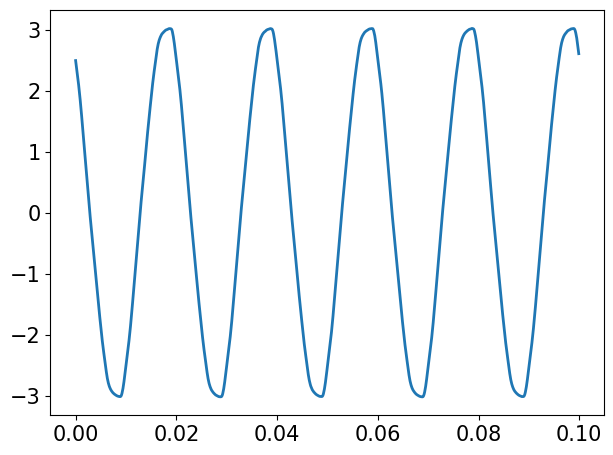

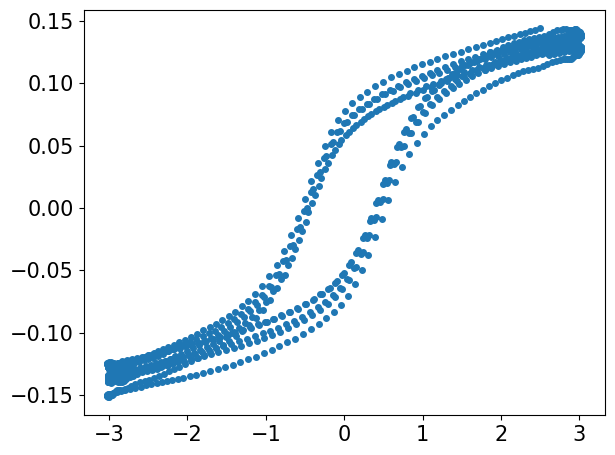

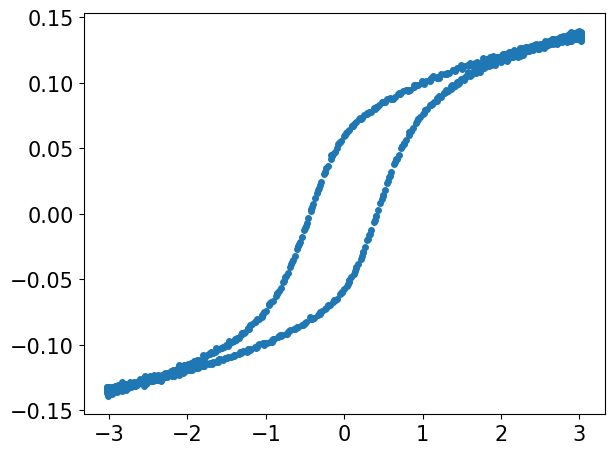

In [38]:
df = pd.read_csv(f'files/med2/{names[10]}.csv',index_col=0)
df.V_H = -df.V_H
df.V_B -= (min(df.V_B) + max(df.V_B))/2

t = np.arange(len(df))/10000

integral = -cumtrapz(df.V_Bnint,t,initial=0)*375
integral -= integral[df.V_Bnint == max(df.V_Bnint)]

pars,cov = cf(lineal,df.V_pt/900,df.V_pr)
print(f'T = {temp(pars[0])}')

plt.plot(t,df.V_B)
plt.show()
plt.plot(t,integral)
plt.show()
plt.plot(t,df.V_H)
plt.show()
plt.scatter(df.V_H,integral)
plt.show()
plt.scatter(df.V_H,df.V_B)

In [8]:
def read_df(i):
    df = pd.read_csv(f'files/med2/{names[i]}.csv',index_col=0)
    df.V_H = -df.V_H
    df.V_B -= (min(df.V_B) + max(df.V_B))/2
    return df

def integrate(df):
    t = np.arange(len(df))/10000
    integral = -cumtrapz(df.V_Bnint,t,initial=0)*375
    integral -= np.mean(integral[df.V_Bnint == max(df.V_Bnint)])
    return integral

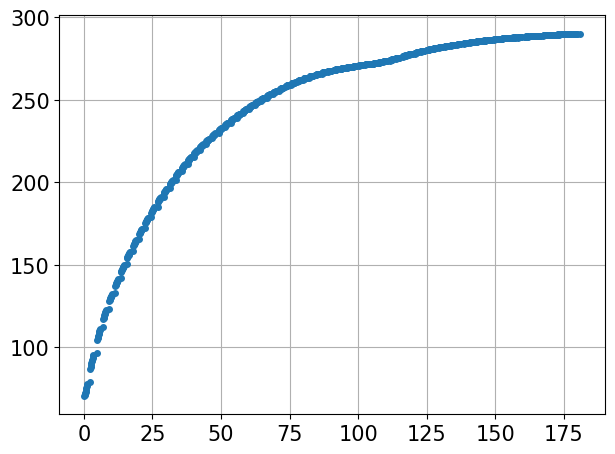

In [9]:
temperaturas_list=[]
for i in range(len(names)):
    df = read_df(i)
    pars,cov = cf(lineal,df.V_pt/900,df.V_pr)
    temperaturas_list.append(temp(pars[0]))
temperaturas = np.array(temperaturas_list)
plt.scatter(names,temperaturas)
plt.grid()

In [10]:
def mag_rem(V_H,V_B):
    mag_values = []
    V_H = np.array(V_H)
    V_B = np.array(V_B)
    for i in range(5):
        x = np.array_split(V_H,5)[i]
        y = np.array_split(V_B,5)[i]

        x1 = np.array(x[y>0])
        y1 = np.array(y[y>0])
        x2 = np.array(x[y<0])
        y2 = np.array(y[y<0])

        try:
            index1 = (np.abs(x1).argmin())
            mag1 = y1[index1]
        except:
            mag1 = 0

        try:
            index2 = (np.abs(x2).argmin())
            mag2 = y2[index2]
        except:
            mag2 = 0
        
        mag_values.append((np.abs(mag1)+np.abs(mag2))/2)
    mag_values = np.array(mag_values)
    mag = np.mean(mag_values)
    err_mag = np.std(mag_values)
    return mag,err_mag

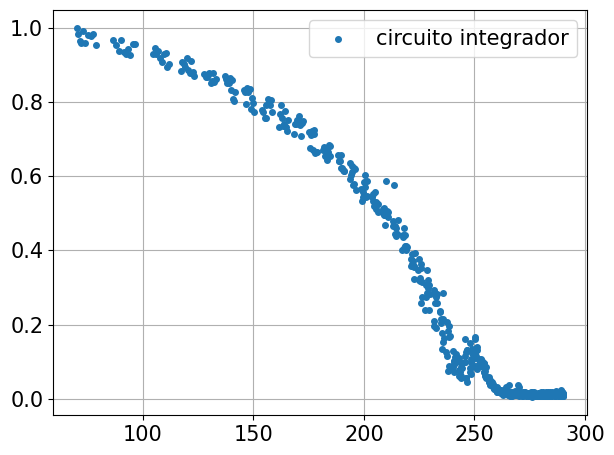

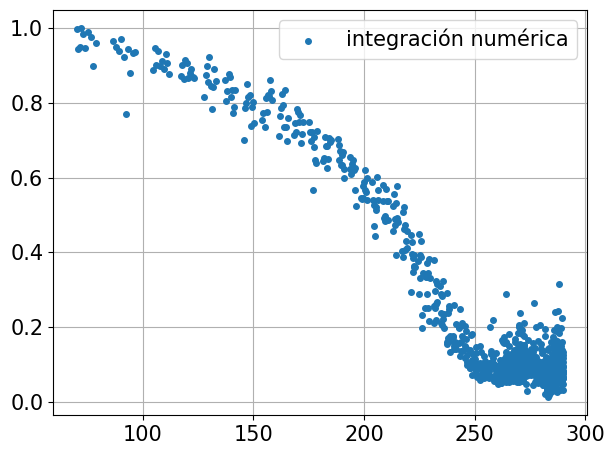

In [86]:
mag_l=[]
err_mag_l = []
mag_num_l = []
err_mag_num_l = []
for i in range(len(names)):
    df = read_df(i)
    mag_rem_c = mag_rem(df.V_H,df.V_B)
    mag_l.append(mag_rem_c[0])
    err_mag_l.append(mag_rem_c[1])
    integral = integrate(df)
    mag_rem_i = mag_rem(df.V_H,integral)
    mag_num_l.append(mag_rem_i[0])
    err_mag_num_l.append(mag_rem_i[1])
mag_c = np.array(mag_l)/max(mag_l)
err_mag_c = np.array(err_mag_l)/max(mag_l)
mag_num = np.array(mag_num_l)/max(mag_num_l)
err_mag_num = np.array(err_mag_num_l)/max(mag_num_l)
plt.scatter(temperaturas,mag_c,label='circuito integrador',zorder=2)
#plt.errorbar(temperaturas,mag_c,yerr=err_mag_c,fmt='none',zorder=1)
plt.grid()
plt.legend()
plt.show()
plt.scatter(temperaturas,mag_num,label='integración numérica',zorder=2)
#plt.errorbar(temperaturas,mag_num,yerr=err_mag_num,fmt='none',zorder=1)
plt.grid()
plt.legend()

In [12]:
df=[]  
for i in range(1,5):
    dfi = pd.read_csv(f'caru/M_{i}.csv')
    df.append(dfi)
df= pd.concat(df, ignore_index=False).sort_values(by='T').query('T <= 3').query('T>=0.5')
temperaturas_met = np.array(df['T'])*100
mag_met = np.array(df.M)

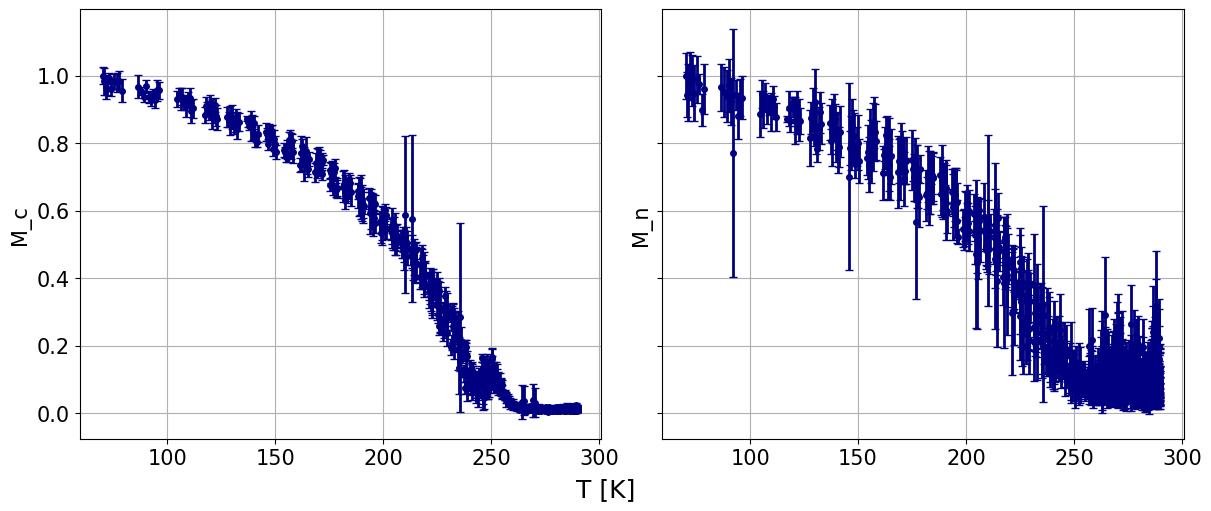

In [98]:
fig,axs = plt.subplots(1,2,figsize=(12,5),sharex=True,sharey=True,layout='constrained')
axs = axs.flat

axs[0].scatter(temperaturas,mag_c,c='navy',zorder=2)
axs[0].errorbar(temperaturas,mag_c,yerr=err_mag_c,fmt='none',ecolor='navy',zorder=1)
axs[0].grid()
axs[0].set_ylabel('M_c')

axs[1].scatter(temperaturas,mag_num,c='navy',zorder=2)
axs[1].errorbar(temperaturas,mag_num,yerr=err_mag_num,fmt='none',ecolor='navy',zorder=1)
axs[1].grid()
axs[1].set_ylabel('M_n')

fig.supxlabel('T [K]')
plt.savefig('plots informe/magnetizacion.png')

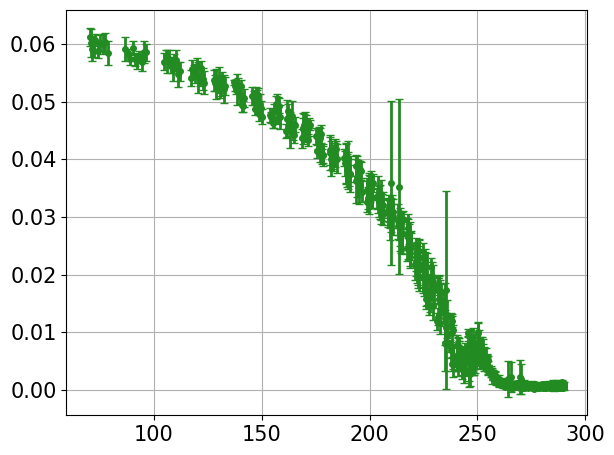

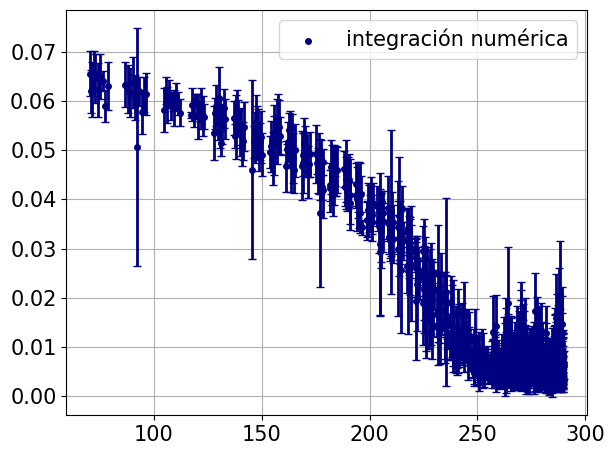

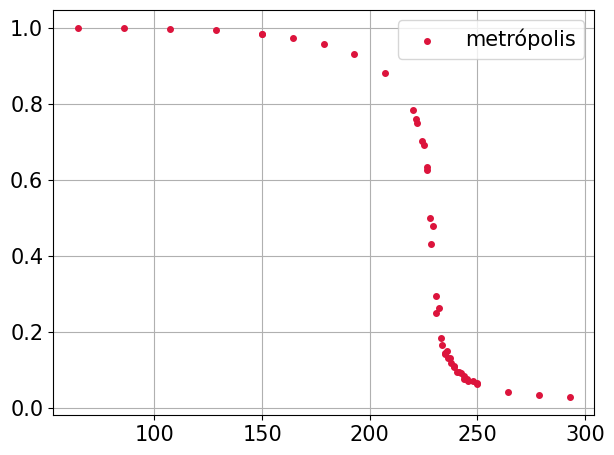

In [84]:
plt.scatter(temperaturas,mag_c,c='forestgreen',label='circuito integrador',zorder=2)
plt.errorbar(temperaturas,mag_c,yerr=err_mag_c,fmt='none',ecolor='forestgreen',zorder=1)
plt.grid()
plt.tight_layout()
plt.show()
plt.scatter(temperaturas,mag_num,c='navy',label='integración numérica',zorder=2)
plt.errorbar(temperaturas,mag_num,yerr=err_mag_num,fmt='none',ecolor='navy',zorder=1)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
plt.scatter(temperaturas_met,mag_met,c='crimson',label='metrópolis',zorder=3)
plt.grid()
plt.legend()
plt.tight_layout()

/tmp/ipykernel_20862/35809724.py:1: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(240-temperaturas),np.log(mag_c),c='forestgreen',label='circuito integrador',zorder=2)


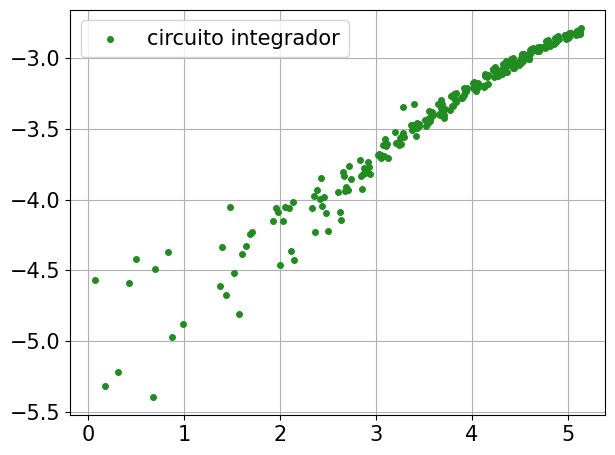

/tmp/ipykernel_20862/35809724.py:5: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(250-temperaturas),np.log(mag_num),c='navy',label='integración numérica',zorder=1)


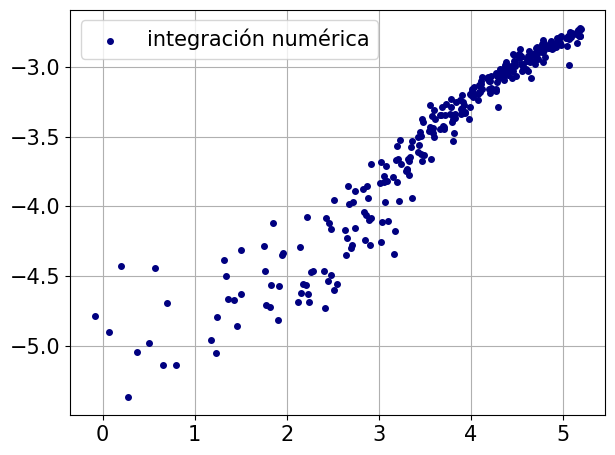

/tmp/ipykernel_20862/35809724.py:9: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(250-temperaturas_met),np.log(mag_met),c='crimson',label='metrópolis',zorder=3)
/tmp/ipykernel_20862/35809724.py:9: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(250-temperaturas_met),np.log(mag_met),c='crimson',label='metrópolis',zorder=3)


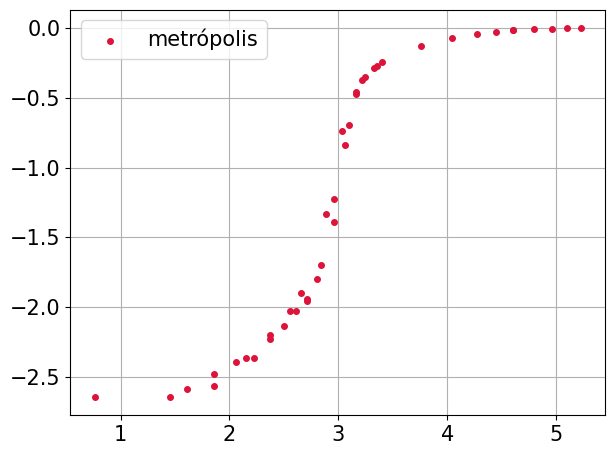

In [14]:
plt.scatter(np.log(240-temperaturas),np.log(mag_c),c='forestgreen',label='circuito integrador',zorder=2)
plt.grid()
plt.legend()
plt.show()
plt.scatter(np.log(250-temperaturas),np.log(mag_num),c='navy',label='integración numérica',zorder=1)
plt.grid()
plt.legend()
plt.show()
plt.scatter(np.log(250-temperaturas_met),np.log(mag_met),c='crimson',label='metrópolis',zorder=3)
plt.grid()
plt.legend()

In [15]:
from sklearn.linear_model import LinearRegression

[0.47886303]
R-squared: 0.9361600894437978
[161.40522496 238.93008332]


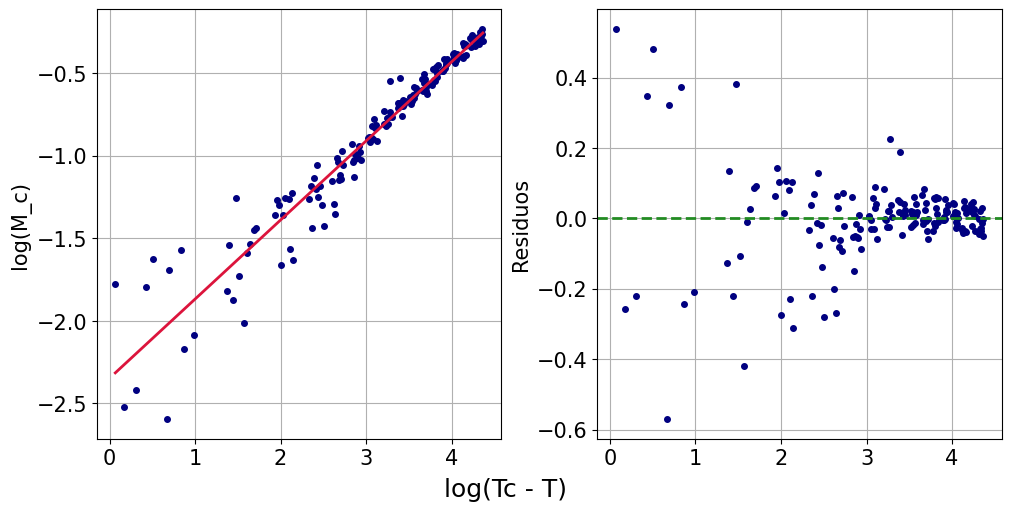

In [105]:
T_c_estimate = 240

x = np.log(T_c_estimate-temperaturas[temperaturas<T_c_estimate])
y = np.log(mag_c[temperaturas<T_c_estimate])

#y = y[x>2]
#x = x[x>2]
y = y[x<4.4]
x = x[x<4.4]

# Reshape x for sklearn (2D array required)
X = x.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
print(model.coef_)
# Predict y-values using the linear model
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals against x
fig,axs = plt.subplots(1,2,figsize=(10,5),sharex=True,layout='constrained')
axs = axs.flat

axs[0].scatter(x,y,c='navy',label='Datos',zorder=1)
axs[0].plot(x,y_pred,'crimson',label='Ajuste',zorder=2)
axs[0].grid()
axs[0].set_ylabel('log(M_c)')

axs[1].scatter(x, residuals,c='navy',zorder=1)
axs[1].axhline(y=0, color='forestgreen', linestyle='--',zorder=2)  # Add horizontal line at y=0 for reference
axs[1].grid()
axs[1].set_ylabel('Residuos')

fig.supxlabel('log(Tc - T)')
plt.savefig('plots informe/linealidad_c.png')

# Print R-squared value
r_squared = model.score(X, y)
print("R-squared:", r_squared)

lineal_range_c = np.array([240-np.e**max(x),240-np.e**min(x)])
print(lineal_range_c)

240.80871946588664 0.0054117424919449585 0.49774604104479864
0.17891814427078373
1.2202931782671274


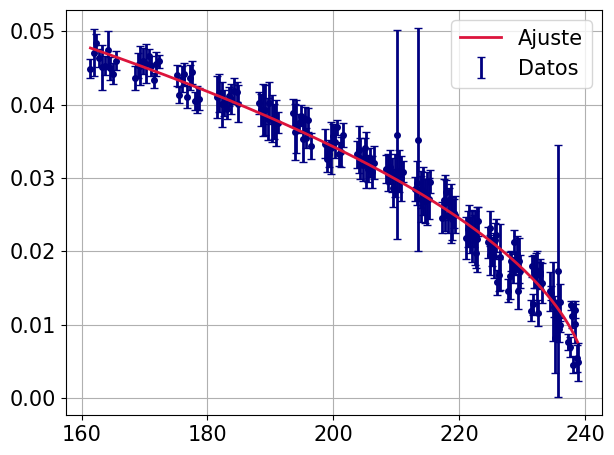

In [34]:
mags = mag_c[temperaturas<lineal_range_c[1]]
err_mags = err_mag_c[temperaturas<lineal_range_c[1]]
temps = temperaturas[temperaturas<lineal_range_c[1]]
mags = mags[lineal_range_c[0]<temps]
err_mags = err_mags[lineal_range_c[0]<temps]
temps = temps[lineal_range_c[0]<temps]

pars,cov = cf(func,temps,mags,p0=[lineal_range_c[1],1,0.33],sigma=err_mags,absolute_sigma=True)

x_adj = np.linspace(min(temps),max(temps[temps<pars[0]]),300)

plt.scatter(temps,mags,c='navy',zorder=2)
plt.errorbar(temps,mags,yerr=err_mags,fmt='none',ecolor='navy',label='Datos',zorder=1)
plt.plot(x_adj,func(x_adj,*pars),'crimson',label='Ajuste',zorder=3)
plt.grid()
plt.legend()
print(*pars)
Tc_c = pars[0]
print(cov[0,0])
print(chi2_red(mags,err_mags,temps,func,pars))

[ 0.4521475  -5.07443754]


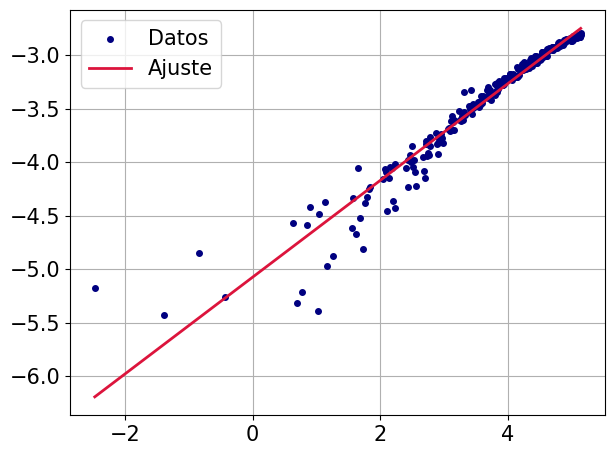

In [35]:
x = np.log(Tc_c-temperaturas[temperaturas<Tc_c])
y = np.log(mag_c[temperaturas<Tc_c])

pars,cov = cf(lineal,x,y)
x_adj = np.linspace(min(x),max(x),300)

plt.scatter(x,y,c='navy',label='Datos',zorder=1)
plt.plot(x_adj,lineal(x_adj,*pars),'crimson',label='Ajuste',zorder=3)
plt.grid()
plt.legend()
print(pars)
beta_c = pars[0]